In [ ]:
pip install easyocr
pip install imutils

TZK8
result [([[40.30769230769231, 18.53846153846154], [265.59219338116384, -2.3543547789870933], [267.6923076923077, 55.46153846153846], [42.40780661883614, 77.35435477898709]], 'TTZK8', 0.2913119401033061)]
Number plate detected:  TZK8


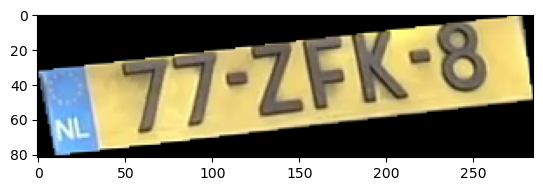

In [15]:
# import cv2
# from matplotlib import pyplot as plt
# import numpy as np
# import imutils
# import easyocr
# # 1. Read in Image, Grayscale and Blur
# image_path = '/Users/siddharthreddyenjam/Sem-3/DIP/Project/License Plate Recognition(LPR)/lpr_dataset/images/N1.jpeg'
# img = cv2.imread(image_path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# # 2. Apply filter and find edges for localization
# img.shape
# bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
# edged = cv2.Canny(bfilter, 30, 200) #Edge detection
# plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# # 3. Find Contours and Apply Mask
# keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# contours = imutils.grab_contours(keypoints)
# contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
# location = None
# for contour in contours:
#     approx = cv2.approxPolyDP(contour, 10, True)
#     if len(approx) ==4:
#         location = approx
#         break
# location
# new_loc = list(list(i) for j in range(4) for i in location[j])
# new_loc
# mask = np.zeros(gray.shape, np.uint8)
# new_image = cv2.drawContours(mask, [location], 0,255, -1)
# new_image = cv2.bitwise_and(img, img, mask=mask)
# mask.shape

# plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# (x,y) = np.where(mask==255)
# (x1, y1) = (np.min(x), np.min(y))
# (x2, y2) = (np.max(x), np.max(y))
# cropped_image = gray[x1:x2+1, y1:y2+1]

# plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# def correct_tilt(image, coordinates):
#     # Convert the coordinates to a numpy array
#     coordinates = np.array(coordinates)

#     # Calculate the angle of tilt based on the coordinates
#     angle = 0
#     if len(coordinates) == 4:
#         # Calculate the angle of the longest side of the bounding box formed by the coordinates
#         x1, y1 = coordinates[0][0], coordinates[0][1]
#         x2, y2 = coordinates[1][0], coordinates[1][1]
#         x3, y3 = coordinates[2][0], coordinates[2][1]
#         x4, y4 = coordinates[3][0], coordinates[3][1]

#         # Calculate the lengths of the sides of the quadrilateral
#         d1 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
#         d2 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)

# #         print(d1, d2)
#         # Calculate the angle of the longest side with respect to the horizontal axis
#         angle = np.arctan2(abs(y2 - y1), abs(x2 - x1)) * 180 / np.pi
#         if d2 > d1:
#             angle = np.arctan2(abs(y3 - y2), abs(x3 - x2)) * 180 / np.pi

#     # Rotate the image to correct the tilt
#     (h, w) = image.shape[:2]
#     center = (w // 2, h // 2)
#     M = cv2.getRotationMatrix2D(center, angle, 1.0)
#     rotated_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

#     return rotated_image

# # Load the image
# # image = cv2.imread('original_image.jpg')

# # Coordinates of the object in the image
# coordinates = tuple(new_loc)  # Example coordinates (adjust based on your data)

# # Correct the tilt for the object at the specified coordinates
# corrected_image = correct_tilt(new_image, coordinates)

# # Display the original and corrected images
# plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
# # plt.imshow('Original Image', new_image)
# # plt.imshow('Corrected Image', corrected_image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()

# plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))

# import cv2
# import easyocr

# def remove_background(image):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Apply thresholding
#     _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     # Find contours
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Get the largest contour
#     contour = max(contours, key=cv2.contourArea)

#     # Create a mask for the contour
#     mask = np.zeros_like(gray)
#     cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

#     # Apply the mask to the image to remove the background
#     result = cv2.bitwise_and(image, image, mask=mask)

#     return result

# def crop_object(image):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Find contours
#     contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Get the bounding box of the largest contour
#     x, y, w, h = cv2.boundingRect(contours[0])

#     # Crop the object from the image
#     cropped_image = image[y:y+h, x:x+w]

#     return cropped_image

# # Load the image
# # image = cv2.imread('image_with_object.jpg')

# # Remove black background
# removed_background = remove_background(corrected_image)

# # Crop the object
# cropped_object = crop_object(removed_background)

# # Initialize EasyOCR reader
# reader = easyocr.Reader(['en'])

# # Apply EasyOCR to extract text
# result = reader.readtext(cropped_object)

# # Print the extracted text
# fs = ''
# for detection in result:
#     if len(detection)>1:
#         fs = fs + str(detection[1])
# if fs:
#     print(fs)
# else:
#     print(detection[1])

# # Display the cropped object
# # cv2.imshow('Cropped Object', cropped_object)
# plt.imshow(cv2.cvtColor(cropped_object, cv2.COLOR_BGR2RGB))


# def remove_black_background(image):
#     # Convert image to grayscale
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#     # Threshold the grayscale image to get a binary mask of the non-black regions
#     _, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)

#     # Find contours in the binary mask
#     contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     # Get the bounding box of the non-black regions
#     x, y, w, h = cv2.boundingRect(contours[0])

#     # Crop the image based on the bounding box
#     cropped_image = image[y:y+h, x:x+w]

#     return cropped_image

# # Load the image with black background
# # image = cv2.imread('image_with_black_background.jpg')

# # Remove black background and crop the image
# cropped_image = remove_black_background(corrected_image)

# # Display the original and cropped images
# # cv2.imshow('Original Image', corrected_image)
# # cv2.imshow('Cropped Image', cropped_image)

# # plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

# # 4. Use Easy OCR To Read Text
# reader = easyocr.Reader(['en'])
# result = reader.readtext(cropped_image)
# print("result", result)

# print("Number plate detected: ", fs)


In [20]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt

def correct_tilt(image, coordinates):
    # Convert the coordinates to a numpy array
    coordinates = np.array(coordinates)

    # Calculate the angle of tilt based on the coordinates
    angle = 0
    if len(coordinates) == 4:
        # Calculate the angle of the longest side of the bounding box formed by the coordinates
        x1, y1 = coordinates[0][0], coordinates[0][1]
        x2, y2 = coordinates[1][0], coordinates[1][1]
        x3, y3 = coordinates[2][0], coordinates[2][1]
        x4, y4 = coordinates[3][0], coordinates[3][1]

        # Calculate the lengths of the sides of the quadrilateral
        d1 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        d2 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)

        # Calculate the angle of the longest side with respect to the horizontal axis
        angle = np.arctan2(abs(y2 - y1), abs(x2 - x1)) * 180 / np.pi
        if d2 > d1:
            angle = np.arctan2(abs(y3 - y2), abs(x3 - x2)) * 180 / np.pi

    # Rotate the image to correct the tilt
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    return rotated_image

def remove_background(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Get the largest contour
    contour = max(contours, key=cv2.contourArea)

    # Create a mask for the contour
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)

    # Apply the mask to the image to remove the background
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Load the image
image_path = '/Users/siddharthreddyenjam/Sem-3/DIP/Project/License Plate Recognition(LPR)/lpr_dataset/images/N1.jpeg'
img = cv2.imread(image_path)

# Grayscale and blur
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply bilateral filter and edge detection
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)

# Find contours and get the location of the license plate
contours, _ = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Print the number of contours found
print("Number of contours found:", len(contours))

# Iterate through contours and print their areas
for idx, contour in enumerate(contours):
    print("Contour", idx+1, "Area:", cv2.contourArea(contour))

# Uncomment the following lines after verifying the contours and areas
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

# Correct the tilt
corrected_image = correct_tilt(img, location)


# Remove background
removed_background = remove_background(corrected_image)

# Initialize EasyOCR reader
reader = easyocr.Reader(['en'])

# Apply EasyOCR to extract text
result = reader.readtext(removed_background)

# Print the extracted text
if result:
    plate_number = result[0][1]
    print("Detected Plate Number:", plate_number)
else:
    print("No plate number detected")

# Display the corrected and background removed image
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(cv2.cvtColor(bfilter, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Bilateral Filtered Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Edge Detection')
axs[1, 0].axis('off')

# Uncomment the following lines after processing
axs[1, 1].imshow(cv2.cvtColor(removed_background, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Corrected and Background Removed Image')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


Number of contours found: 10
Contour 1 Area: 27942.0
Contour 2 Area: 27905.5
Contour 3 Area: 15548.0
Contour 4 Area: 14163.0
Contour 5 Area: 9002.0
Contour 6 Area: 9001.0
Contour 7 Area: 7393.5
Contour 8 Area: 6510.5
Contour 9 Area: 6508.5
Contour 10 Area: 6047.0


IndexError: index 1 is out of bounds for axis 0 with size 1